In [3]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

data_file_path = r"C:\Users\govertsen.k\Northeastern University\Community Resilience in Extreme Temperatures - Data\Vulnerability Mapping"
data_file_path = data_file_path.replace(os.sep, '/')

In [4]:
# Constants
labelfont = {'fontname':'Calibri'}
ticksize = 10
labelsize = 12
titlesize = 18

extension = 'csv'
os.chdir(data_file_path)
result = glob.glob('*.{}'.format(extension))

death = pd.read_csv(data_file_path + '/Merged_Death_Data.csv',low_memory=False)
death = death.sort_values(by='date_of_death')
death = death.reset_index(drop=True)
death['date_of_death'] = pd.to_datetime(death['date_of_death'])

weather = pd.read_csv(data_file_path + '/Weather Files/USW00094746.csv',low_memory=False)
#weather = weather.sort_values(by='DATE')
weather['DATE'] = pd.to_datetime(weather['DATE'])

In [5]:
# reduce weather 
weather = weather.loc[(weather['DATE'] >= death['date_of_death'][0]) & (weather['DATE'] <= death['date_of_death'].iloc[-1]) ]
weather = weather.reset_index(drop=True)


In [6]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,...,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV01,WV01_ATTRIBUTES,WV03,WV03_ATTRIBUTES
0,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,1969-01-01,50.0,",,X",60.0,",,X",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,1969-01-02,10.0,",,X",10.0,",,X",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,1969-01-03,70.0,",,X",80.0,",,X",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,1969-01-04,20.0,",,X",0.0,",,X",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,1969-01-05,10.0,",,X",0.0,",,X",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16674,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,2014-08-27,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16675,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,2014-08-28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16676,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,2014-08-29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16677,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,2014-08-30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


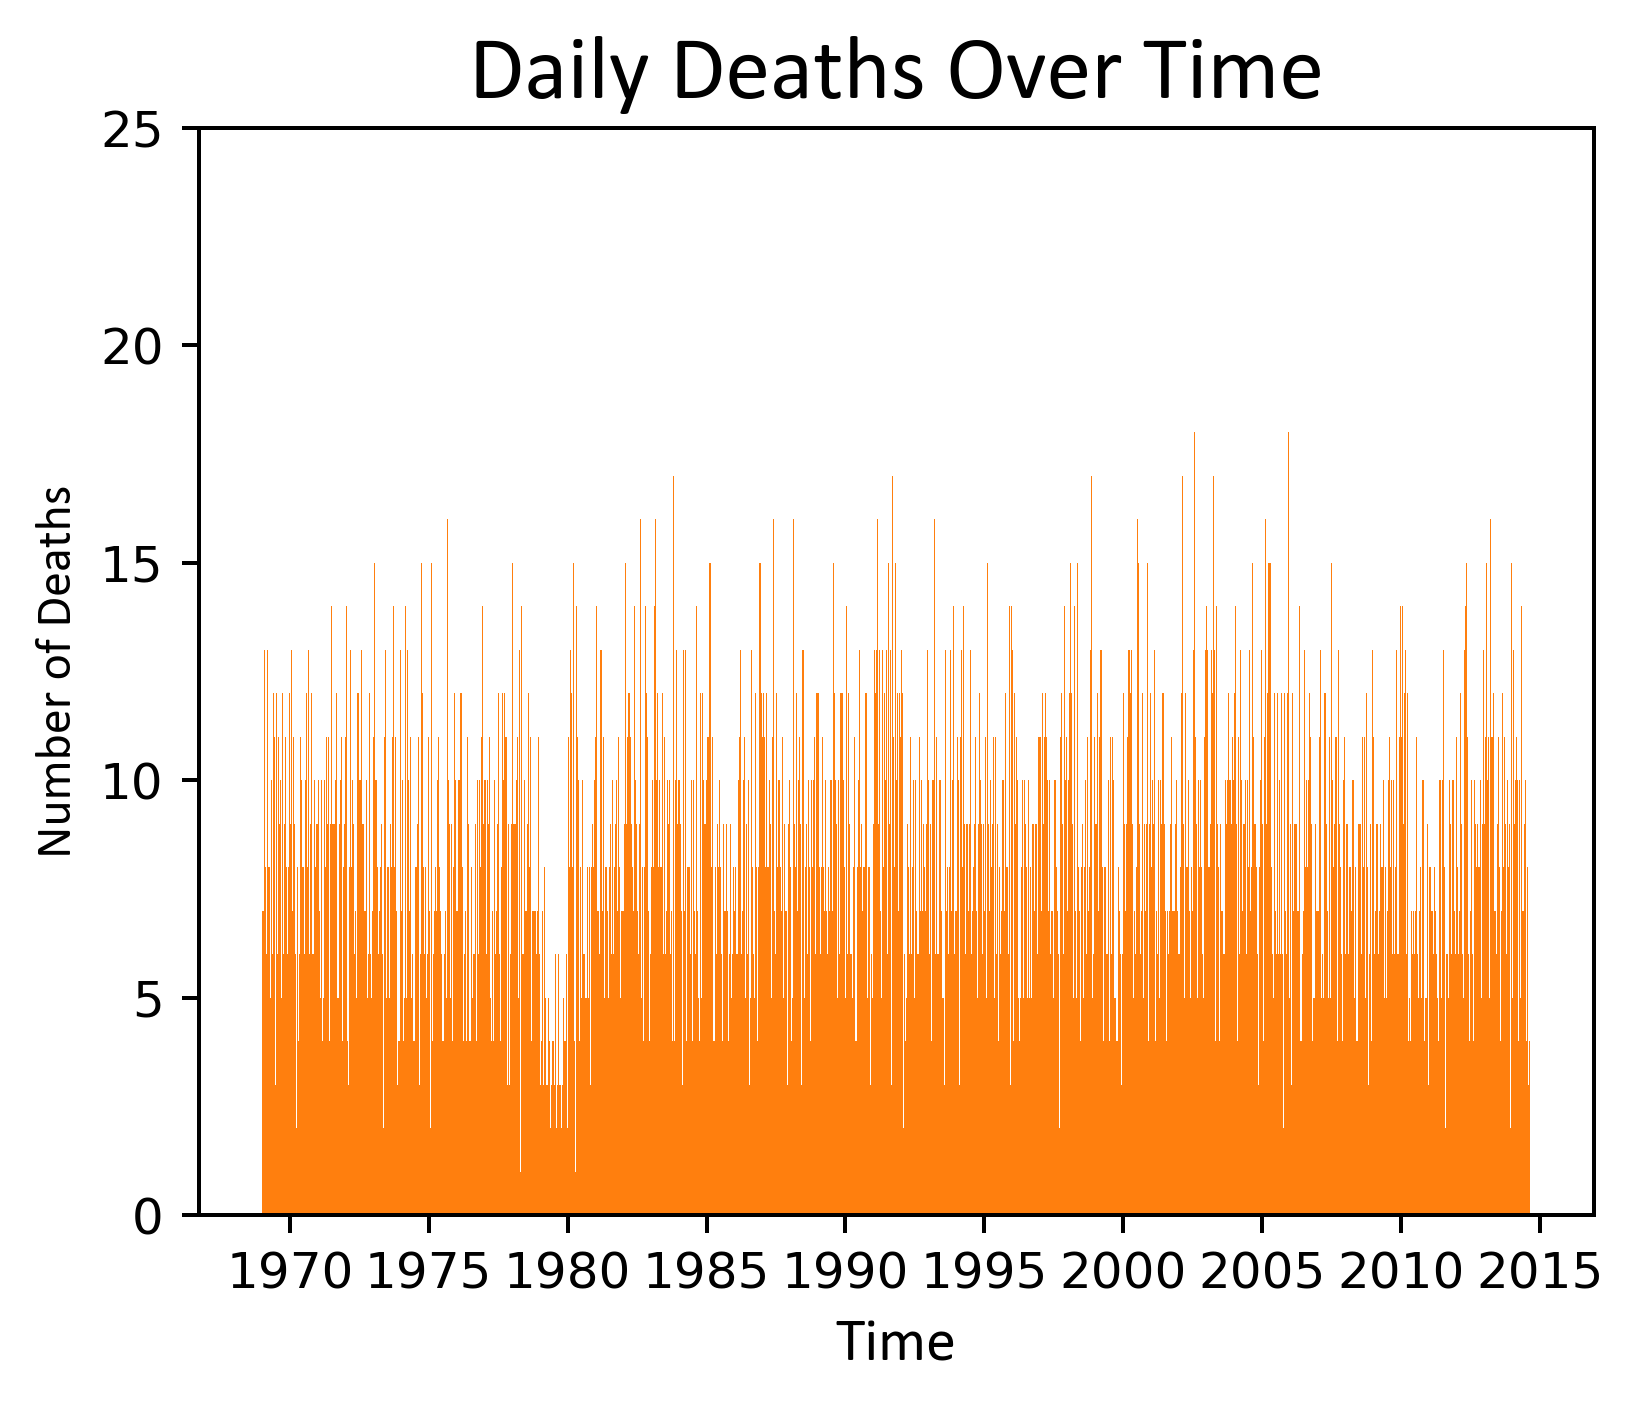

In [7]:
f1=plt.figure(figsize=(5,4),dpi=360)
plt.hist(death['date_of_death'],bins=pd.unique(death['date_of_death']))
plt.ylim([0,25])
plt.ylabel('Number of Deaths', fontsize=ticksize,**labelfont)
plt.xlabel('Time',fontsize=labelsize,**labelfont)
plt.title('Daily Deaths Over Time',fontsize=titlesize,**labelfont)
counts, bins, bars = plt.hist(death['date_of_death'],bins=pd.unique(death['date_of_death']))

In [8]:
death['date_of_death']

0        1969-01-01
1        1969-01-01
2        1969-01-01
3        1969-01-01
4        1969-01-01
            ...    
139194   2014-08-31
139195   2014-08-31
139196   2014-08-31
139197   2014-08-31
139198   2014-08-31
Name: date_of_death, Length: 139199, dtype: datetime64[ns]

In [9]:
bins

array([ -365.,  -364.,  -363., ..., 16311., 16312., 16313.])

Text(0.5, 1.0, 'Daily Weather')

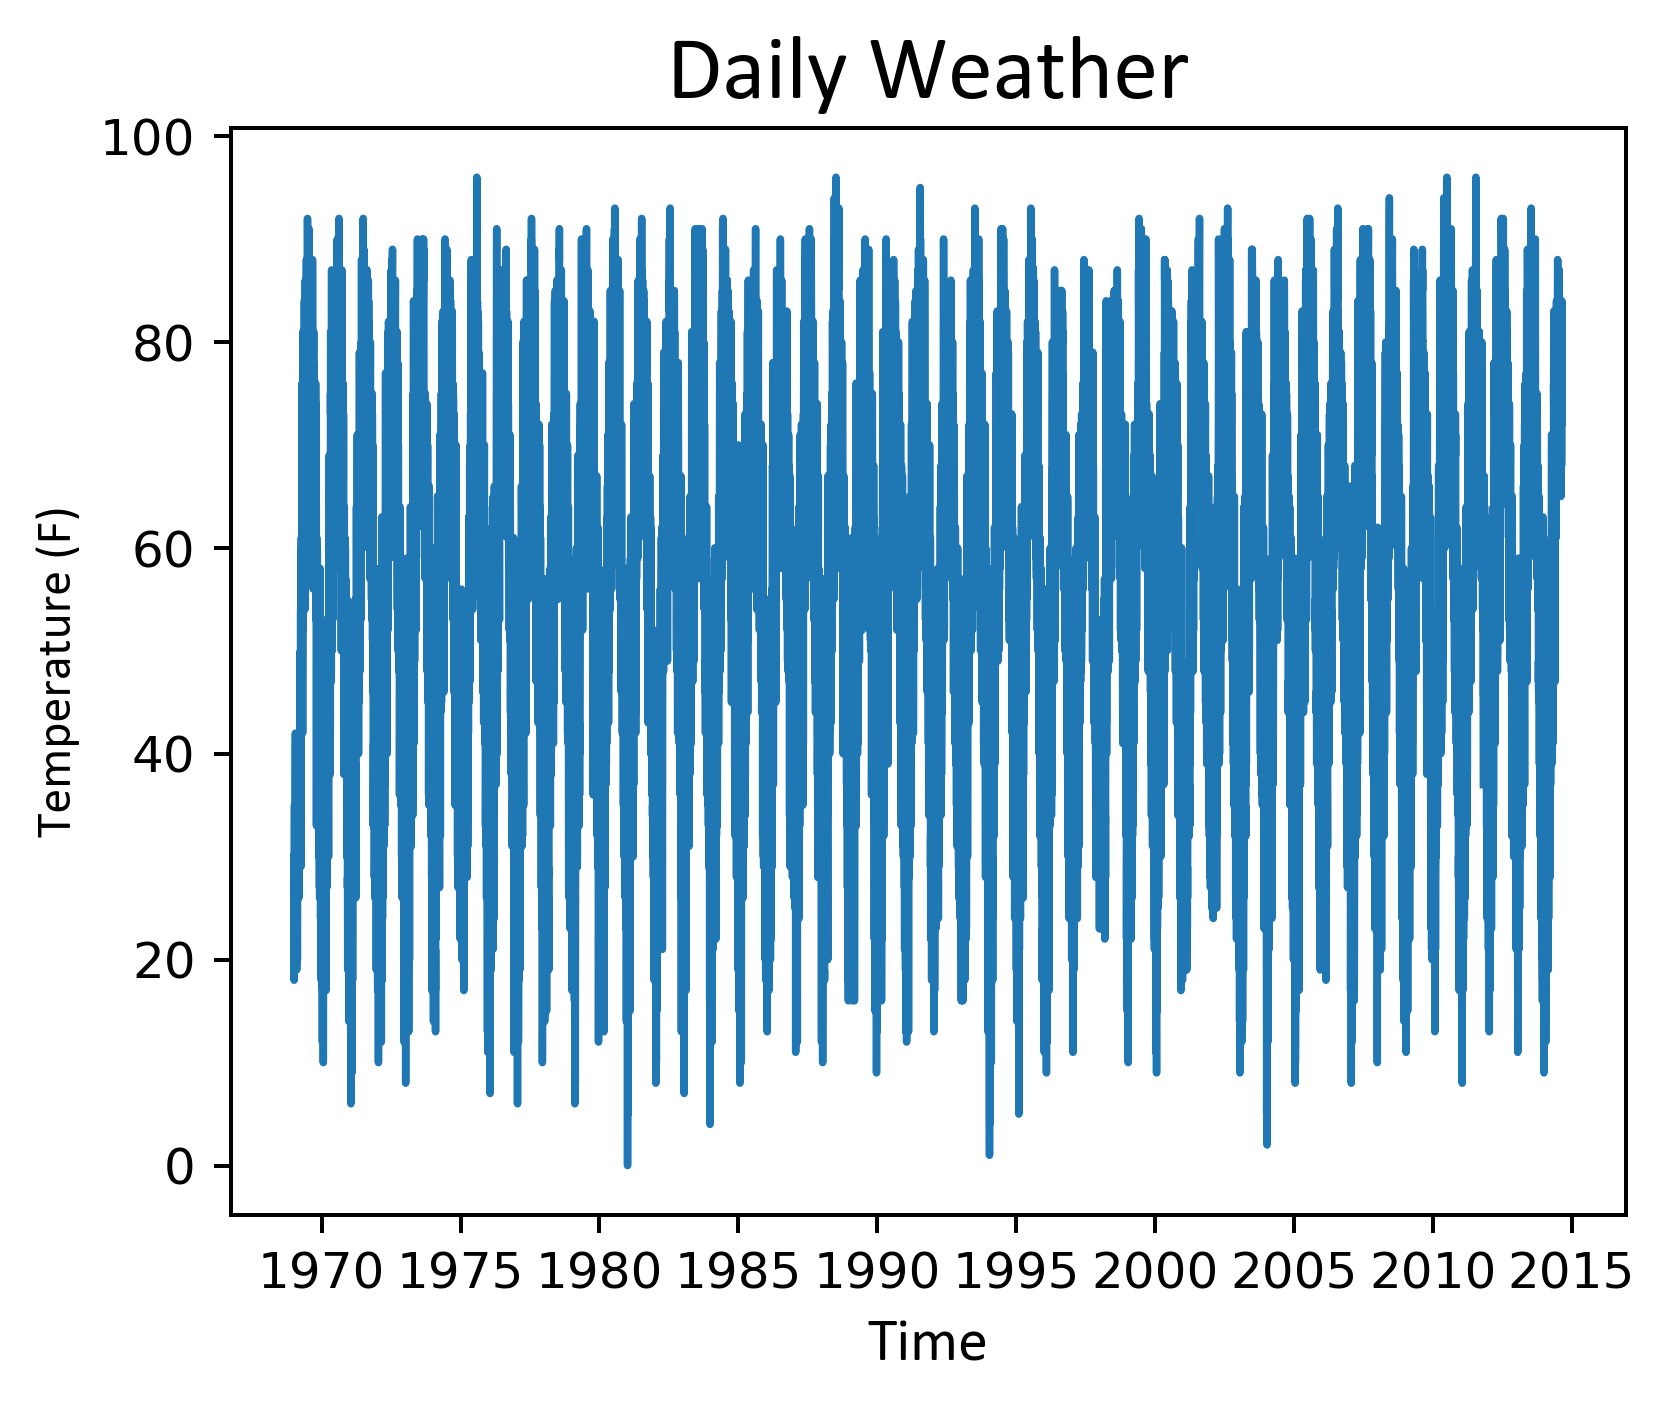

In [10]:
f2=plt.figure(figsize=(5,4),dpi=360)
plt.plot(weather['DATE'],weather['TMAX'])
# xticks = np.arange(min(pd.to_datetime(weather['DATE']).dt.year),max(pd.to_datetime(weather['DATE']).dt.year),5)
# xtick_lables = str(xticks)
#plt.xticks(xticks,rotation = 90,fontsize=10,**labelfont)
plt.ylabel('Temperature (F)', fontsize=ticksize,**labelfont)
plt.xlabel('Time',fontsize=labelsize,**labelfont)
plt.title('Daily Weather',fontsize=titlesize,**labelfont)

In [11]:
weather['DEATH']=0
for each_date in weather['DATE']:
    weather.loc[weather['DATE'] == each_date,'DEATH'] = len(death.loc[death['date_of_death'] == each_date])

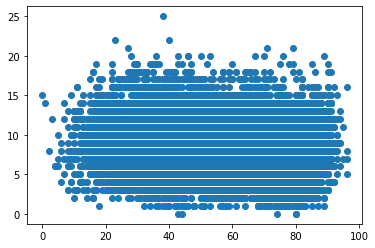

In [12]:
plt.scatter(weather['TMAX'],weather['DEATH'])

<AxesSubplot:title={'center':'DEATH'}, xlabel='TMAX'>

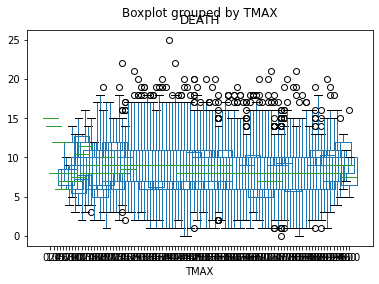

In [13]:
weather.boxplot(by='TMAX',column='DEATH',grid=False,widths=5)

In [14]:
#range(
import math
by = 3
xticks = np.arange(min(weather['TMAX']),math.ceil(max(weather['TMAX'])/by)*by+by,by)
weather['GROUP']=0
for each_tick in xticks:
    weather.loc[(weather['TMAX']>=each_tick)&(weather['TMAX']<each_tick+by),'GROUP'] = each_tick

<AxesSubplot:title={'center':'DEATH'}, xlabel='GROUP'>

<Figure size 1800x1440 with 0 Axes>

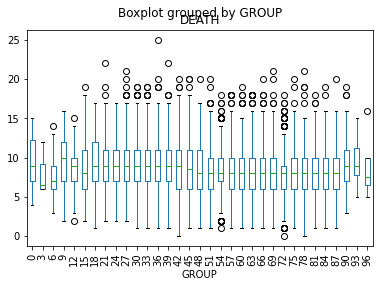

In [15]:
f3=plt.figure(figsize=(5,4),dpi=360)
weather.boxplot(by='GROUP',column='DEATH',grid=False,rot=90)